In [1]:
import numpy as np
import pandas as pd
import re, os, path, csv
import glob

import h5py
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, r'C:\Users\shadd\OneDrive\Documents\Python\frxas.py')

from frxas import time_domain, models, hdf5_io
%reload_ext autoreload
%autoreload 2

In [3]:
def sort_func(all_files):
    return int(all_files.split('\\E')[-1].split('.txt')[0])

In [4]:
direc = r'E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_0.5Hz\\Txt Files\\'
freq_in = 0.5
ROhm = 27.89

Ir_avgs = []
for E in range(1, 181):
    ti, V, J, Ir, Io, If, Eta = [], [], [], [], [], [], []
    Ir_adj, J_adj, V_adj, Eta_adj = [], [], [], []
    Ir_adj_fit, J_adj_fit, V_adj_fit, Eta_adj_fit = [], [], [], []
    match_str = f'E{E}.txt'
    print(direc+match_str)
    ti, V, J, Ir, Io, If = time_domain.extract_data(direc, match_str,skip_head=0, sort_func=sort_func, end=2, xray_disp=False, xray_raw=True)
    ti = ti[::50]
    # Reversing V and J because the BioLogic SP-150 inverts these
    V = -V[::50]
    J = -J[::50]
    Ir = Ir[::50]
    Io = Io[::50]
    If = If[::50]
    print('Finished reading data')
    b = 0.1 * freq_in * (ti[-1]+ti[1])
    Eta = V - J * ROhm 
    print('Phase align Ir')
    Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, Eta, Ir, freq_in, b, phase=-90)
    print('Phase align J')
    J_adj, J_adj_fit = time_domain.phase_align(ti, Eta, J, freq_in, b, phase=-90)
    print('Phase align V')
    V_adj, V_adj_fit = time_domain.phase_align(ti, Eta, V, freq_in, b, phase=-90)
    print('Phase align Eta')
    Eta_adj, Eta_adj_fit = time_domain.phase_align(ti, Eta, Eta, freq_in, b, phase=-90)

    print('Save fits')
#     hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_0.5Hz\\{str(match_str[:-4])}_EtaAlign_Ir', Ir_adj_fit)
#     hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_0.5Hz\\{str(match_str[:-4])}_EtaAlign_J', J_adj_fit)
#     hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_0.5Hz\\{str(match_str[:-4])}_EtaAlign_V', V_adj_fit)
#     hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_0.5Hz\\{str(match_str[:-4])}_EtaAlign_Eta', Eta_adj_fit)
    Ir_avgs.append(np.mean(If/Io))

Elist_fname = f'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\Dynamic XAS\\Energy List.txt'
energies = np.genfromtxt(Elist_fname)

# f0 = open('..\\Feb2018 Data Fits\\Energy Spectrum_0.5Hz\\Energies_Iravgs.csv', 'w+', newline='')
# f = csv.writer(f0)
# f.writerow(['File', 'Energy (eV)', 'Ir Avg'])
# for i, (energy, Ir_avg) in enumerate(zip(energies, Ir_avgs)):
#     f.writerow([i+1, energy, Ir_avg])
#     print(f'E{i+1}, {energy}, {Ir_avg}')
# f0.close()

E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_0.5Hz\\Txt Files\\E1.txt
Finished reading data
Phase align Ir
Phase align J
Phase align V
Phase align Eta
Save fits
E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_0.5Hz\\Txt Files\\E2.txt
Finished reading data
Phase align Ir


KeyboardInterrupt: 

In [5]:
Elist_fname = f'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\Dynamic XAS\\Energy List.txt'
energies = np.genfromtxt(Elist_fname)

f0 = open('..\\Feb2018 Data Fits\\Energy Spectrum_0.5Hz\\Energies_Iravgs.csv', 'w+', newline='')
f = csv.writer(f0)
f.writerow(['File', 'Energy (eV)', 'Ir Avg'])
for i, (energy, Ir_avg) in enumerate(zip(energies, Ir_avgs)):
    f.writerow([i+1, energy, Ir_avg])
    print(f'E{i+1}, {energy}, {Ir_avg}')
f0.close()

E1, 7600.067, 1.376746862041467
E2, 7610.641, 1.5333181506478823
E3, 7624.556, 1.5811253967931265
E4, 7637.2, 1.6308285419794588
E5, 7649.699, 1.624436477663284
E6, 7662.199, 1.6256657683841618
E7, 7674.733, 1.7408324006379772
E8, 7687.331, 1.6368161795486451
E9, 7700.01, 1.642090565961313
E10, 7700.388, 1.645405147587245
E11, 7700.719, 1.64987663283183
E12, 7701.071, 1.6492493638561447
E13, 7701.434, 1.6451397733253308
E14, 7701.798, 1.6505838780508841
E15, 7702.155, 1.6503566103969904
E16, 7702.515, 1.6475752832746533
E17, 7702.879, 1.6454181713024123
E18, 7703.242, 1.6455671863584198
E19, 7703.6, 1.6449311081667768
E20, 7703.961, 1.6478352706974968
E21, 7704.325, 1.6521218949637424
E22, 7704.687, 1.6518897019053123
E23, 7705.02, 1.6504353359257826
E24, 7705.381, 1.648534085111711
E25, 7705.749, 1.650749903448115
E26, 7706.112, 1.6632577643422939
E27, 7706.471, 1.6724149287016183
E28, 7706.831, 1.6884002920544983
E29, 7707.196, 1.7006346233412326
E30, 7707.557, 1.7113852837715773
E31

In [8]:
direc = r'E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_1Hz\\Txt Files\\'
freq_in = 1
ROhm = 32.5
step = 25

# Ir_avgs = []
for E in range(110, 181):

    ti, V, J, Ir, Io, If, Eta = [], [], [], [], [], [], []
    Ir_adj, J_adj, V_adj, Eta_adj = [], [], [], []
    Ir_adj_fit, J_adj_fit, V_adj_fit, Eta_adj_fit = [], [], [], []
    match_str = f'E{E}.txt'
    print(direc+match_str)
    ti, V, J, Ir, Io, If = time_domain.extract_data(direc, match_str,skip_head=0, sort_func=sort_func, end=2, xray_disp=False, xray_raw=True)
    ti = ti[::step]
    # Reversing V and J because the BioLogic SP-150 inverts these
    V = -V[::step]
    J = -J[::step]
    Ir = Ir[::step]
    Io = Io[::step]
    If = If[::step]
    print('Finished reading data', ti.size)
    b = 0.1 * freq_in * (ti[-1]+ti[1])
    Eta = V - J * ROhm 
    print('Phase align Ir')
    Ir_adj, Ir_adj_fit = time_domain.phase_align(ti, Eta, Ir, freq_in, b, phase=-90)
    print('Phase align J')
    J_adj, J_adj_fit = time_domain.phase_align(ti, Eta, J, freq_in, b, phase=-90)
    print('Phase align V')
    V_adj, V_adj_fit = time_domain.phase_align(ti, Eta, V, freq_in, b, phase=-90)
    print('Phase align Eta')
    Eta_adj, Eta_adj_fit = time_domain.phase_align(ti, Eta, Eta, freq_in, b, phase=-90)

    print('Save fits')
    hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_1Hz\\ROhm_32\\{str(match_str[:-4])}_EtaAlign_Ir', Ir_adj_fit)
    hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_1Hz\\ROhm_32\\{str(match_str[:-4])}_EtaAlign_J', J_adj_fit)
    hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_1Hz\\ROhm_32\\{str(match_str[:-4])}_EtaAlign_V', V_adj_fit)
    hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_1Hz\\ROhm_32\\{str(match_str[:-4])}_EtaAlign_Eta', Eta_adj_fit)
    Ir_avgs.append(np.mean(If/Io))

Elist_fname = f'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\Dynamic XAS\\Energy List.txt'
energies = np.genfromtxt(Elist_fname)

f0 = open('..\\Feb2018 Data Fits\\Energy Spectrum_1Hz\\ROhm_32\\Energies_Iravgs.csv', 'w+', newline='')
f = csv.writer(f0)
f.writerow(['File', 'Energy (eV)', 'Ir Avg'])
for i, (energy, Ir_avg) in enumerate(zip(energies, Ir_avgs)):
    f.writerow([i+1, energy, Ir_avg])
    print(f'E{i+1}, {energy}, {Ir_avg}')
f0.close()

E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_1Hz\\Txt Files\\E110.txt
Finished reading data 122000
Phase align Ir
Phase align J
Phase align V
Phase align Eta
Save fits
E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_1Hz\\Txt Files\\E111.txt
Finished reading data 122000
Phase align Ir
Phase align J
Phase align V
Phase align Eta
Save fits
E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_1Hz\\Txt Files\\E112.txt
Finished reading data 122000
Phase align Ir
Phase align J
Phase align V
Phase align Eta
Save fits
E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_1Hz\\Txt Files\\E113.txt
Finished reading data 122000
Phase align Ir
Phase align J
Phase align V
Phase align Eta
Save fits
E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_1Hz\\Txt Files\\E114.txt
Finished reading data 122000
Phase align Ir
Phase align J
Phase align V
Phase align Eta
Save fits
E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_1Hz\\Txt Files\\E115.txt
Finished reading data 122000
Phase align Ir
Phase align J
Ph

In [62]:
direc = r'E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_5Hz\\Txt Files\\'
freq_in = 5
ROhm = 63.6
step = 50
ang = -90

Ir_avgs = []
for E in range(1, 181):
    ti, V, J, Ir, Io, If, Eta = [], [], [], [], [], [], []
    Ir_adj, J_adj, V_adj, Eta_adj = [], [], [], []
    Ir_adj_fit, J_adj_fit, V_adj_fit, Eta_adj_fit = [], [], [], []
    match_str = f'E{E}.txt'
    print(direc+match_str)
    ti, V, J, Ir, Io, If = time_domain.extract_data(direc, match_str,skip_head=0, sort_func=sort_func, end=2, xray_disp=False, xray_raw=True)
#     ti = ti[::step]
    # Reversing V and J because the BioLogic SP-150 inverts these
    klu = int(3/(freq_in*4)*5e4)
    V = -V[:-klu:step]
    J = -J[klu::step]
    Ir = Ir[:-klu:step]
    Io = Io[:-klu:step]
    If = If[:-klu:step]
    print('Finished reading data')
    b = 0.1 * freq_in * (ti[-1]+ti[1])
    Eta = V - J * ROhm
    try:
        print('Phase align Ir')
        Ir_adj, Ir_adj_fit = time_domain.phase_align(ti[:-klu:step], Eta, Ir, freq_in, b, phase=ang)
        print('Phase align J')
        J_adj, J_adj_fit = time_domain.phase_align(ti[klu::step] - ti[klu], Eta, J, freq_in, b, phase=ang)
        print('Phase align V')
        V_adj, V_adj_fit = time_domain.phase_align(ti[:-klu:step], Eta, V, freq_in, b, phase=ang)
        print('Phase align Eta')
        Eta_adj, Eta_adj_fit = time_domain.phase_align(ti[:-klu:step], Eta, Eta, freq_in, b, phase=ang)

        Z = (V_adj_fit.params['h1_re_comp'].value + 1j* V_adj_fit.params['h1_im_comp'].value) / (J_adj_fit.params['h1_re_comp'].value + 1j*J_adj_fit.params['h1_im_comp'].value)
        print(f' Z: {Z}')
        print('Save fits')
        hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_5Hz\\Kludge_t_adjust\\{str(match_str[:-4])}_EtaAlign_Ir', Ir_adj_fit)
        hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_5Hz\\Kludge_t_adjust\\{str(match_str[:-4])}_EtaAlign_J', J_adj_fit)
        hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_5Hz\\Kludge_t_adjust\\{str(match_str[:-4])}_EtaAlign_V', V_adj_fit)
        hdf5_io.save_time_domain_fit(f'..\\Feb2018 Data Fits\\Energy Spectrum_5Hz\\Kludge_t_adjust\\{str(match_str[:-4])}_EtaAlign_Eta', Eta_adj_fit)
        Ir_avgs.append(np.mean(If/Io))

    except:
        print(f'Analyzing E{E} unsuccessful')

Elist_fname = f'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\Dynamic XAS\\Energy List.txt'
energies = np.genfromtxt(Elist_fname)

f0 = open('..\\Feb2018 Data Fits\\Energy Spectrum_5Hz\\Kludge_t_adjust\\Energies_Iravgs.csv', 'w+', newline='')
f = csv.writer(f0)
f.writerow(['File', 'Energy (eV)', 'Ir Avg'])
for i, (energy, Ir_avg) in enumerate(zip(energies, Ir_avgs)):
    f.writerow([i+1, energy, Ir_avg])
    print(f'E{i+1}, {energy}, {Ir_avg}')
f0.close()

E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_5Hz\\Txt Files\\E1.txt
Finished reading data
Phase align Ir
Phase align J
Phase align V
Phase align Eta
 Z: (58.10762870316725-8.143522153697697j)
Save fits
E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_5Hz\\Txt Files\\E2.txt
Finished reading data
Phase align Ir
Phase align J
Phase align V
Phase align Eta
 Z: (58.325673965704986-8.187831852891604j)
Save fits
E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_5Hz\\Txt Files\\E3.txt
Finished reading data
Phase align Ir
Phase align J
Phase align V
Phase align Eta
 Z: (58.435134236508034-8.194495179260043j)
Save fits
E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_5Hz\\Txt Files\\E4.txt
Finished reading data
Phase align Ir
Phase align J
Phase align V
Phase align Eta
 Z: (58.47266690393023-8.105969738387989j)
Save fits
E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_5Hz\\Txt Files\\E5.txt
Finished reading data
Phase align Ir
Phase align J
Phase align V
Phase align Eta
 Z: (58.54487203

In [60]:
f0 = open('..\\Feb2018 Data Fits\\Energy Spectrum_5Hz\\Kludge_t_adjust\\Energies_Iravgs.csv', 'w+', newline='')
f = csv.writer(f0)
f.writerow(['File', 'Energy (eV)', 'Ir Avg'])
for i, (energy, Ir_avg) in enumerate(zip(energies, Ir_avgs)):
    f.writerow([i+94, energies[i+94], Ir_avg])
    print(f'E{i+94}, {energies[i+94]}, {Ir_avg}')
f0.close()

E94, 7720.766, 2.5004659608291098
E95, 7720.879, 2.532907965043893


In [4]:
direc = r'E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_0.5Hz\\Txt Files\\'
E = 82
freq_in = 0.5
ROhm = 27.89
Ir_avgs = []
bads = []

ti, V, J, Ir, Io, If, Eta = [], [], [], [], [], [], []
match_str = f'E{E}.txt'
print(direc+match_str)
ti, V, J, Ir, Io, If = time_domain.extract_data(direc, match_str,skip_head=0, sort_func=sort_func, end=2, xray_disp=False, xray_raw=True)
ti = ti[::50]
# Reversing V and J because the BioLogic SP-150 inverts these
V = -V[::50]
J = -J[::50]
Ir = Ir[::50]
Io = Io[::50]
If = If[::50]
Eta = V -J * ROhm 

E:\\UW Research\\fr-XAS Feb 2018\\Energy Spectrum_0.5Hz\\Txt Files\\E82.txt


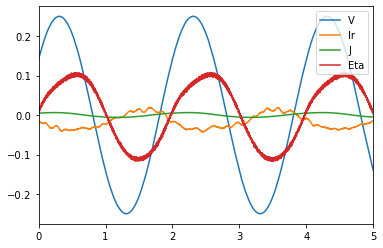

In [5]:
_, ax = plt.subplots()
ax.plot(ti, V, label='V')
ax.plot(ti, Ir, label='Ir')
ax.plot(ti, J, label='J')
ax.plot(ti, Eta, label='Eta')
ax.set_xlim(0,5)
ax.legend(loc='upper right')
plt.show()

NameError: name 'tis' is not defined

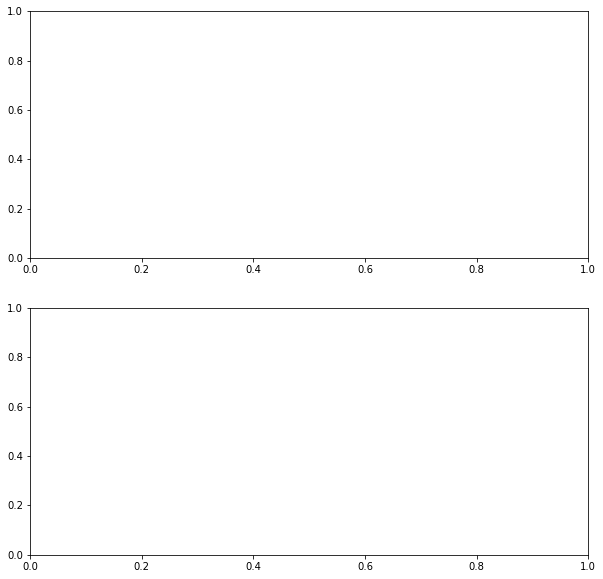

In [6]:
_, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,10))
step = 2000
for i, (ti, V, J, Ir, Ir_fit) in enumerate(zip(tis, Vs, Js, Ir_adjs, Ir_fits)):
    ax1.plot(ti[1:Ns_wfm:step], Ir[1:Ns_wfm:step].real-np.mean(Ir[:Ns_wfm].real), label=str(i))
    ax2.plot(ti[1:Ns_wfm:step], V[1:Ns_wfm:step].real)
    frequencies = Ir_fit.userkws['frequencies']
# for i, (ti, V, J, Ir, Ir_fit) in enumerate(zip(tis, Vs, Js, Ir_adjs, Ir_fits)):
#     Ir_synth = np.fft.ifft(np.fft.ifftshift(Ir_fit.eval()*(ti.size*np.pi)))
#     ax1.plot(ti[1:Ns_wfm:step], Ir_synth[1:Ns_wfm:step].real,'--')
ax1.set_xlim(0,1/freq_in)
ax2.set_xlim(0,1/freq_in)
ax1.legend(loc='upper left')
plt.show()